# Pachete necesare pentru folosirea acestui Notebook

Vom folosi [scipy](https://scipy.org/), [numpy](https://numpy.org/) și [matplotlib](https://matplotlib.org/).

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import datasets, ndimage
from scipy.fft import dctn, idctn

# Imaginea cu care lucrăm

Vom folosi o imagine din setul de date oferit implicit de către scipy.

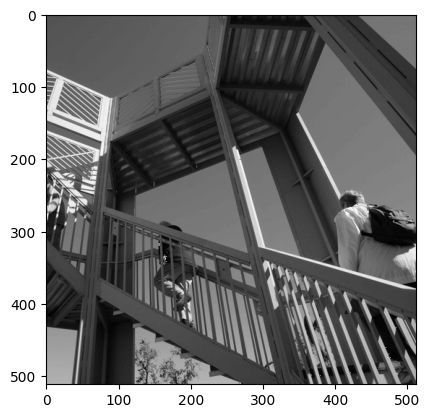

In [9]:
X = datasets.ascent()
plt.imshow(X, cmap=plt.cm.gray)
plt.show()

# Transformata DCT a unei imagini

Transformata DCT se extinde la mai multe dimensiuni similar cu transformata DFT. Pentru un semnal bidimensional, precum o imagine, DCT-II devine:

$$
Y_{m_1,m_2} = \sum_{n_1=0}^{N_1-1}
              \sum_{n_2=0}^{N_2-1}
              x_{n_1,n_2}
              \cos\left[\frac{\pi}{N_1}m_1
                \left(n_1 + \frac12\right)\right]
              \cos\left[\frac{\pi}{N_2}m_2\left(n_2 + \frac12\right)\right]
$$

* unde $n_1$ și $n_2$ sunt pozițile pixelilor pe orizontală, respectiv, pe verticală
* bin-urile rezultate corespund pozițiilor pixelilor
* spectrul este în continuare simetric și par
* proprietățile transformatei DCT-II sunt respectate și în cazul celei 2D

În Python avem rutina `scipy.fft.dct` pentru 1D și `scipy.fft.dctn` pentru generalizarea la semnale $n$-dimensionale. Dimensiunea este determinată automat după forma semnalului; tipul DCT poate fi specificat prin atributul `type` (implicit II).

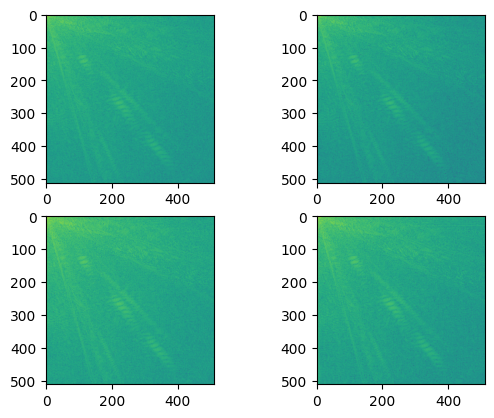

In [10]:
Y1 = dctn(X, type=1)
Y2 = dctn(X, type=2)
Y3 = dctn(X, type=3)
Y4 = dctn(X, type=4)
freq_db_1 = 20*np.log10(abs(Y1))
freq_db_2 = 20*np.log10(abs(Y2))
freq_db_3 = 20*np.log10(abs(Y3))
freq_db_4 = 20*np.log10(abs(Y4))

plt.subplot(221).imshow(freq_db_1)
plt.subplot(222).imshow(freq_db_2)
plt.subplot(223).imshow(freq_db_3)
plt.subplot(224).imshow(freq_db_4)
plt.show()

# Compactarea energiei. Compresie.

Putem profita de proprietatea compresiei energiei prin anularea frecvențelor DCT începând cu *bin*-ul `k` după care aplicăm transformata DCT inversă (similar cu tema anterioară):

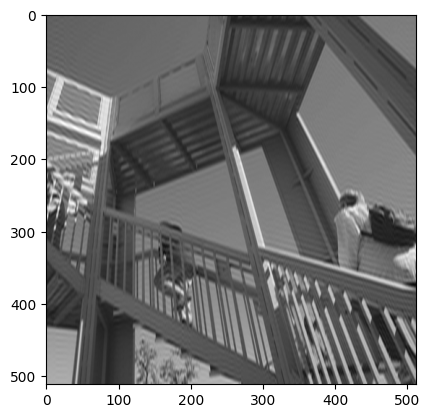

In [11]:
k = 120

Y_ziped = Y2.copy()
Y_ziped[k:] = 0
X_ziped = idctn(Y_ziped)

plt.imshow(X_ziped, cmap=plt.cm.gray)
plt.show()

# JPEG

Algoritmul de compresie JPEG are patru etape:

1. transformarea imaginii din pixeli RGB în Y'CbCr
2. aplicarea 2D-DCT pe blocuri disincte de 8x8 pixeli din imagine
3. cuantizarea în frecvență cu $Q$ dat de standardul JPEG
4. compresia rezultatului cu coduri Huffman

Unde matricea JPEG de cuantizare $Q$ este:
$$
Q =
\begin{bmatrix}
16 & 11 & 10 & 16 & 24 & 40 & 51 & 61 & \\
12 & 12 & 14 & 19 & 26 & 28 & 60 & 55 & \\
14 & 13 & 16 & 24 & 40 & 57 & 69 & 56 & \\
14 & 17 & 22 & 29 & 51 & 87 & 80 & 62 & \\
18 & 22 & 37 & 56 & 68 & 109 & 103 & 77 & \\
24 & 35 & 55 & 64 & 81 & 104 & 113 & 92 & \\
49 & 64 & 78 & 87 & 103 & 121 & 120 & 101\\
72 & 92 & 95 & 98 & 112 & 100 & 103 & 99\\
\end{bmatrix}
$$

Imaginea noastră de test este monocromă, deci nu necesită pasul 1, dar putem efectua o operație de *down-sampling* în preprocesare precum am prezentat la curs.

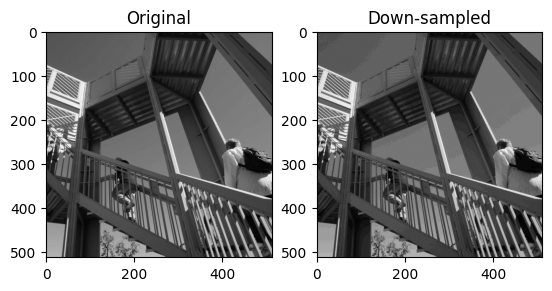

In [12]:
Q_down = 10

X_jpeg = X.copy()
X_jpeg = Q_down*np.round(X_jpeg/Q_down);

plt.subplot(121).imshow(X, cmap=plt.cm.gray)
plt.title('Original')
plt.subplot(122).imshow(X_jpeg, cmap=plt.cm.gray)
plt.title('Down-sampled')
plt.show()

Pentru fiecare bloc de $8\times 8$ aplică DCT și cuantizare.

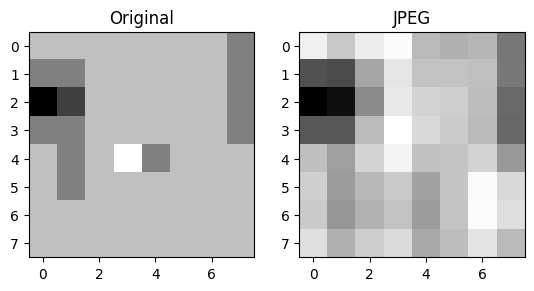

Componente în frecvență:64
Componente în frecvență după cuantizare: 14


In [13]:
Q_jpeg = [[16, 11, 10, 16, 24, 40, 51, 61],
          [12, 12, 14, 19, 26, 28, 60, 55],
          [14, 13, 16, 24, 40, 57, 69, 56],
          [14, 17, 22, 29, 51, 87, 80, 62],
          [18, 22, 37, 56, 68, 109, 103, 77],
          [24, 35, 55, 64, 81, 104, 113, 92],
          [49, 64, 78, 87, 103, 121, 120, 101],
          [72, 92, 95, 98, 112, 100, 103, 99]]

# Encoding
x = X[:8, :8]
y = dctn(x)
y_jpeg = Q_jpeg*np.round(y/Q_jpeg)

# Decoding
x_jpeg = idctn(y_jpeg)

# Results
y_nnz = np.count_nonzero(y)
y_jpeg_nnz = np.count_nonzero(y_jpeg)

plt.subplot(121).imshow(x, cmap=plt.cm.gray)
plt.title('Original')
plt.subplot(122).imshow(x_jpeg, cmap=plt.cm.gray)
plt.title('JPEG')
plt.show()

print('Componente în frecvență:' + str(y_nnz) + 
      '\nComponente în frecvență după cuantizare: ' + str(y_jpeg_nnz))

# Sarcini

1. [6p] Completați algoritmul JPEG incluzând toate blocurile din imagine.

2. [4p] Extindeți la imagini color (incluzând transformarea din RGB în Y'CbCr).

3. [6p] Extindeți algoritmul pentru compresia imaginii până la un prag MSE impus de utilizator.

4. [4p] Extindeți algoritmul pentru compresie video. Demonstrați pe un clip scurt din care luați fiecare cadru și îl tratați ca pe o imagine.

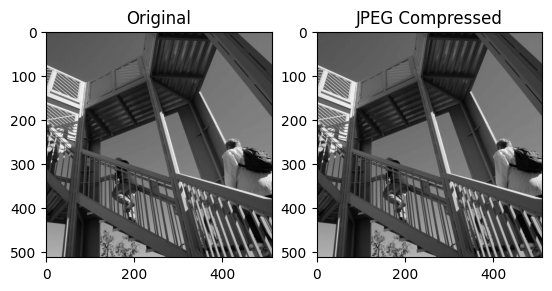

In [14]:
def quantify_image(X, Q):
    X_jpeg = np.zeros_like(X)
    rows, cols = X.shape
    for i in range(0, rows, 8):
        for j in range(0, cols, 8):
            block = X[i:i+8, j:j+8]
            dct_block = dctn(block)
            q_block = Q * np.round(dct_block / Q)
            idct_block = idctn(q_block)
            X_jpeg[i:i+8, j:j+8] = idct_block
    return X_jpeg

X_jpeg = quantify_image(X, Q_jpeg)
plt.subplot(121).imshow(X, cmap=plt.cm.gray)
plt.title('Original')
plt.subplot(122).imshow(X_jpeg, cmap=plt.cm.gray)
plt.title('JPEG Compressed')
plt.show()

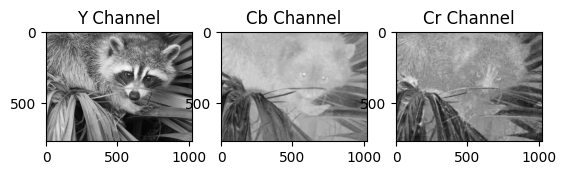

In [ ]:
X = datasets.face()

# Got the numbers from https://www.w3.org/Graphics/JPEG/jfif3.pdf
def rgb2ycbcr(img):
    ycbcr = np.empty_like(img, dtype=np.float32)
    ycbcr[..., 0] =   0.299 * img[..., 0] +  0.587 * img[..., 1] +  0.114 * img[..., 2]
    ycbcr[..., 1] = -0.1687 * img[..., 0] - 0.3313 * img[..., 1] +    0.5 * img[..., 2] + 128
    ycbcr[..., 2] =     0.5 * img[..., 0] - 0.4187 * img[..., 1] - 0.0813 * img[..., 2] + 128
    return ycbcr

def ycbcr2rgb(img):
    rgb = np.empty_like(img, dtype=np.float32)
    rgb[..., 0] = img[..., 0] + 1.402 * (img[..., 2] - 128)
    rgb[..., 1] = img[..., 0] - 0.344136 * (img[..., 1] - 128) - 0.714136 * (img[..., 2] - 128)
    rgb[..., 2] = img[..., 0] + 1.772 * (img[..., 1] - 128)
    return rgb


X_ycbcr = rgb2ycbcr(X)
Y = X_ycbcr[..., 0]
Cb = X_ycbcr[..., 1]
Cr = X_ycbcr[..., 2]

plt.subplot(131).imshow(Y, cmap=plt.cm.gray)
plt.title('Y Channel')
plt.subplot(132).imshow(Cb, cmap=plt.cm.gray)
plt.title('Cb Channel')
plt.subplot(133).imshow(Cr, cmap=plt.cm.gray)
plt.title('Cr Channel')
plt.show()

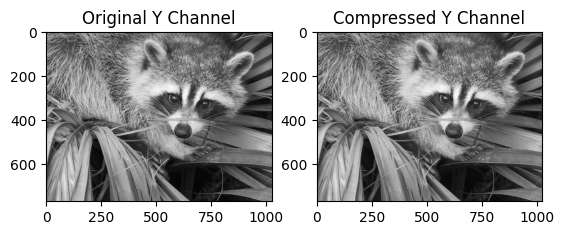

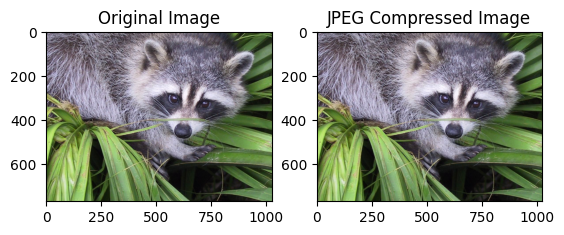

Original bytes:  [[121 112 131]
 [138 129 148]
 [153 144 165]
 ...
 [119 126  74]
 [131 136  82]
 [139 144  90]]
Compressed bytes:  [[120 111 130]
 [138 129 148]
 [153 144 165]
 ...
 [119 126  74]
 [130 135  81]
 [138 143  89]]


In [24]:
# Compress Y channel
Y_jpeg = quantify_image(Y, Q_jpeg)
X_ycbcr_jpeg = np.zeros_like(X_ycbcr)
X_ycbcr_jpeg[..., 0] = Y_jpeg
X_ycbcr_jpeg[..., 1] = Cb
X_ycbcr_jpeg[..., 2] = Cr
plt.subplot(121).imshow(X_ycbcr[..., 0], cmap=plt.cm.gray)
plt.title('Original Y Channel')
plt.subplot(122).imshow(X_ycbcr_jpeg[..., 0], cmap=plt.cm.gray)
plt.title('Compressed Y Channel')
plt.show()

X_jpeg = ycbcr2rgb(X_ycbcr_jpeg).astype(np.uint8)
plt.subplot(121).imshow(X)
plt.title('Original Image')
plt.subplot(122).imshow(X_jpeg)
plt.title('JPEG Compressed Image')
plt.show()

# Making sure the images are different
print("Original bytes: ", X[0])
print("Compressed bytes: ", X_jpeg[0])